In [2]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import time

In [3]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 1000)

start_time = time.time()
data=pd.read_csv('covtype.csv')
print("Read time = {} seconds".format(time.time() - start_time))

Read time = 1.315195083618164 seconds


In [4]:
print('Data Dimension:')
print('Number of Records:', data.shape[0])
print('Number of Features:', data.shape[1])

Data Dimension:
Number of Records: 581012
Number of Features: 55


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [6]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [7]:
from sklearn.model_selection import train_test_split

target = data.Cover_Type
train = data.drop(['Cover_Type'], axis = 1)
# models_results = dict()

start_time = time.time()
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.25, random_state=16)
print("Train test split time = {} seconds".format(time.time() - start_time))

Train test split time = 0.3332939147949219 seconds


In [7]:
from sklearn.ensemble import ExtraTreesClassifier

extraTreesClassifier_estimators = []
extraTreesClassifier_results = []
for estimators in range(10, 301, 10):
    trees = ExtraTreesClassifier(n_estimators = estimators, max_features=10)
    
#     start_time = time.time()
    trees.fit(x_train, y_train)
#     print("ExtraTreesClassifier{} train time = {} seconds".format(estimators, time.time() - start_time))

#     start_time = time.time()
    trees_result = trees.predict(x_test)
#     print("ExtraTreesClassifier{} predict time = {} seconds".format(estimators, time.time() - start_time))

#     start_time = time.time()
    extraTreesClassifier_accuracy = accuracy_score(y_test, trees_result)
#     print("ExtraTreesClassifier{} accuracy time = {} seconds".format(estimators, time.time() - start_time))
#     print("ExtraTreesClassifier{} accuracy: \n".format(estimators), extraTreesClassifier_accuracy)
    
    extraTreesClassifier_results.append(extraTreesClassifier_accuracy)
    extraTreesClassifier_estimators.append(estimators)

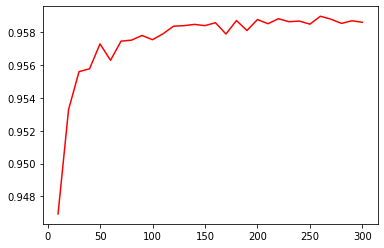

In [8]:
plt.plot(extraTreesClassifier_estimators, extraTreesClassifier_results, color="#FF0000", label="accuracy by estimators number")
plt.show()

In [9]:
print("Best accuracy: ", max(extraTreesClassifier_results))

Best accuracy:  0.9589543761574632


In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_neighbors = []
knn_results = []
for neighbors in range(1, 51):
    knn_neighbors.append(neighbors)
    knn = KNeighborsClassifier(n_neighbors=neighbors)
#     start_time = time.time()
    knn.fit(x_train, y_train)
#     print("KNeighborsClassifier{} train time = {} seconds".format(neighbors, time.time() - start_time))

#     start_time = time.time()
    knn_predict_result = knn.predict(x_test)
#     print("KNeighborsClassifier{} predict time = {} seconds".format(neighbors, time.time() - start_time))
    
#     start_time = time.time()
    accuracy = accuracy_score(y_test, knn_predict_result)
#     print("KNeighborsClassifier{} accuracy time = {} seconds".format(neighbors, time.time() - start_time))
#     print("KNeighborsClassifier{} accuracy".format(neighbors), ": ", accuracy)

    
    knn_results.append(accuracy)

In [11]:
for index in range(len(knn_neighbors)):
    print("Neighbors={}, accuracy={}".format(knn_neighbors[index], knn_results[index]))

Neighbors=1, accuracy=0.9645721602996151
Neighbors=2, accuracy=0.959918211672048
Neighbors=3, accuracy=0.9677528174977453
Neighbors=4, accuracy=0.9644620076693768
Neighbors=5, accuracy=0.9676151267099474
Neighbors=6, accuracy=0.9636565165607595
Neighbors=7, accuracy=0.9642485869482902
Neighbors=8, accuracy=0.9611161215258893
Neighbors=9, accuracy=0.9608338554109037
Neighbors=10, accuracy=0.9582246149821346
Neighbors=11, accuracy=0.9575843528188747
Neighbors=12, accuracy=0.955071495941564
Neighbors=13, accuracy=0.954121429505759
Neighbors=14, accuracy=0.9512092693438345
Neighbors=15, accuracy=0.9507480052047118
Neighbors=16, accuracy=0.9479804203699751
Neighbors=17, accuracy=0.9472162364976972
Neighbors=18, accuracy=0.9447791095536753
Neighbors=19, accuracy=0.9439529648268883
Neighbors=20, accuracy=0.9418049885372419
Neighbors=21, accuracy=0.941033920125574
Neighbors=22, accuracy=0.9394229379083392
Neighbors=23, accuracy=0.9377981866123247
Neighbors=24, accuracy=0.9359806682133932
Neigh

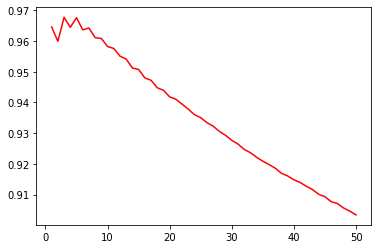

In [12]:
plt.plot(knn_neighbors, knn_results, color="#FF0000", label="accuracy by neighbors number")
plt.show()

In [13]:
import xgboost

xgboost_model = xgboost.XGBClassifier()
start_time = time.time()
xgboost_model.fit(x_train, y_train)
print("XGBClassifier train time = {} seconds".format(time.time() - start_time))

XGBClassifier train time = 98.19127178192139 seconds


In [14]:
start_time = time.time()
xgboost_result = xgboost_model.predict(x_test)
print("XGBoost predict time = {} seconds".format(time.time() - start_time))

start_time = time.time()
xgboost_model_accuracy = accuracy_score(y_test, xgboost_result)
print("XGBoost accuracy time = {} seconds".format(time.time() - start_time))
print("XGBoost accuracy: ", xgboost_model_accuracy)

XGBoost predict time = 1.0359408855438232 seconds
XGBoost accuracy time = 0.010009288787841797 seconds
XGBoost accuracy:  0.8691868670526598


In [ ]:
from sklearn.ensemble import RandomForestClassifier


randomForestClassifier_estimators = []
randomForestClassifier_results = []
for estimators in range(10, 301, 10):
    randomForestClassifier = RandomForestClassifier(n_estimators = estimators, max_features=10)
#     start_time = time.time()
    randomForestClassifier.fit(x_train, y_train)
#     print("RandomForestClassifier train time = {} seconds".format(time.time() - start_time))

#     start_time = time.time()
    randomForest_result = randomForestClassifier.predict(x_test)
#     print("RandomForestClassifier predict time = {} seconds".format(time.time() - start_time))

#     start_time = time.time()
    randomForest_accuracy = accuracy_score(y_test, randomForest_result)
#     print("RandomForestClassifier accuracy time = {} seconds".format(time.time() - start_time))
#     print("RandomForestClassifier accuracy: ", randomForest_accuracy)
    
    randomForestClassifier_estimators.append(estimators)
    randomForestClassifier_results.append(randomForest_accuracy)

In [ ]:
plt.plot(randomForestClassifier_estimators, randomForestClassifier_results, color="#FF0000", label="accuracy by estimators number")
plt.show()

In [ ]:
print("Best accuracy: ", max(randomForestClassifier_results))

In [ ]:
# from sklearn.svm import SVC

# svclassifier = SVC(kernel='linear')
# start_time = time.time()
# svclassifier.fit(x_train, y_train)
# print("SVC linear train time = {} seconds".format(time.time() - start_time))

In [ ]:
# start_time = time.time()
# print("SVC accuracy: ", accuracy_score(y_test, [round(item) for item in svclassifier.predict(x_test)]))
# print("SVC accuracy time = {} seconds".format(time.time() - start_time))

In [ ]:
# start_time = time.time()
# print("SVC score: ", svclassifier.score(x_test, y_test))
# print("SVC score time = {} seconds".format(time.time() - start_time))